# 1. import the cryptocurrencies market data

In [2]:
# Importing pandas
import pandas as pd

# Importing matplotlib and setting aesthetics for plotting later.
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')

# Reading datasets/coinmarketcap_06122017.csv into pandas
dec6 =pd.read_csv('/Users/Documents/Python Jupyter/datasets/coinmarketcap_06122017.csv')

# Selecting the 'id' and the 'market_cap_usd' columns
market_cap_raw = dec6[['id','market_cap_usd']]

# Counting the number of values
market_cap_raw.count()


id                1326
market_cap_usd    1031
dtype: int64

# 2. drop the data of cryptocurrencies that have no market capitalization data

In [3]:
# drop rows without a market capitalization
cap = market_cap_raw.dropna()
cap.count()
cap

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10
4,ripple,9.365343e+09
...,...,...
1026,future-digital-currency,2.510000e+02
1027,environ,1.360000e+02
1028,caliphcoin,1.000000e+02
1029,falcoin,2.300000e+01


# 3. compare BItcoins with others

Text(0, 0.5, '% of total capitalization')

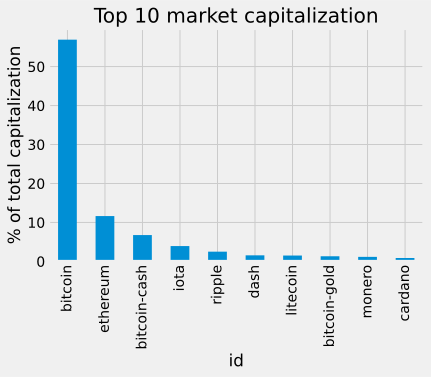

In [4]:
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total capitalization'

# Selecting the first 10 rows and setting the index
cap10 = cap.head(10).set_index('id')

# Calculating market_cap_perc
cap10=cap10.assign(market_perc=lambda x:(x.market_cap_usd/cap.market_cap_usd.sum())*100)

# Plotting the barplot
Top10 = cap10.market_perc.plot.bar(title=TOP_CAP_TITLE)

Top10.set_ylabel(TOP_CAP_YLABEL)

Text(0.5, 0, '')

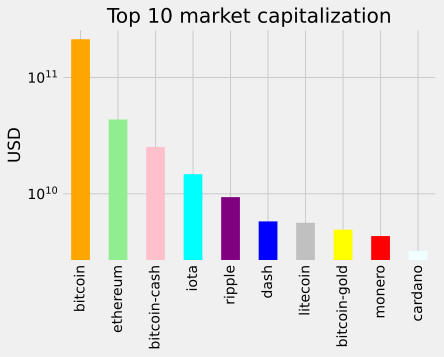

In [7]:
COLORS = ['orange', 'lightgreen', 'pink', 'cyan', 'purple', 'blue', 'silver', 'yellow', 'red', 'azure']


Top10 = cap10.market_cap_usd.plot.bar(title=TOP_CAP_TITLE,logy=True,color=COLORS)

Top10.set_ylabel('USD')

Top10.set_xlabel('')

# 4. access the volatility of cryptocurrencies

In [9]:
volatility = dec6[['id','percent_change_24h','percent_change_7d']]

# Setting the index to 'id' and dropping all NaN rows
volatility =volatility.dropna().set_index('id')
# Sorting the DataFrame by percent_change_24h in ascending order
volatility = volatility.sort_values('percent_change_24h')

volatility.head(10)

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96
bitok,-74.37,-71.67
bankcoin,-68.56,50.14
tellurion,-63.75,-52.59
shadow-token,-61.40,-59.05


# 5. Plot the top losers and top winners

## 5.1 24hr top losers and winners

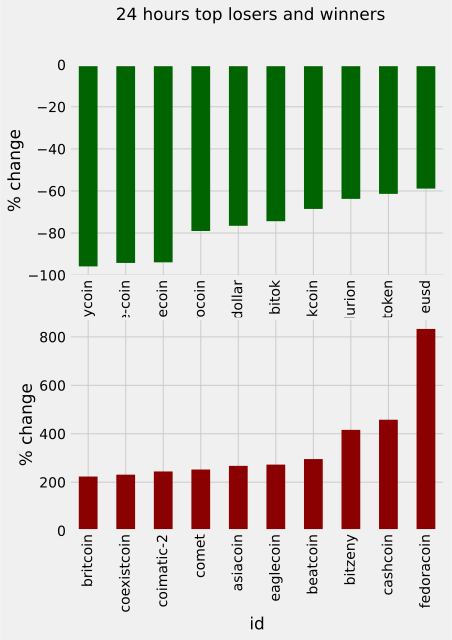

In [11]:
#Defining a function with 2 parameters
def top10_subplot(volatility_series, title):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 8))
    
    LW = volatility_series[:10].plot.bar(color='darkgreen',ax=axes[0])
    fig.suptitle(title)
    LW.set_ylabel('% change')
    
    LW=volatility_series[-10:].plot.bar(color='darkred',ax=axes[1])
    LW.set_ylabel('% change')
    return fig, LW

DTITLE = "24 hours top losers and winners"

fig, LW=top10_subplot(volatility.percent_change_24h,DTITLE)

## 5.2 weekly losers and winners

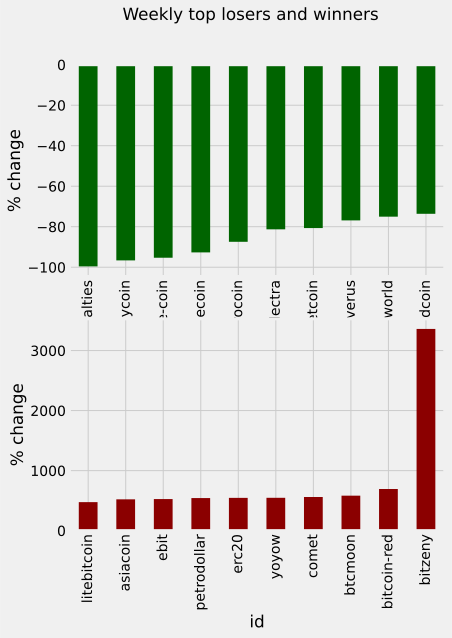

In [12]:
# Sorting in ascending order
volatility7d = volatility.sort_values('percent_change_7d')

WTITLE = "Weekly top losers and winners"

fig,LM=top10_subplot(volatility7d.percent_change_7d,WTITLE)

# 6. size and volumn of each cryptocurrencies

In [13]:
# Selecting everything bigger than 10 billion 
largecaps = cap.query('market_cap_usd>1E+10')

print(largecaps)

             id  market_cap_usd
0       bitcoin    2.130493e+11
1      ethereum    4.352945e+10
2  bitcoin-cash    2.529585e+10
3          iota    1.475225e+10


<BarContainer object of 3 artists>

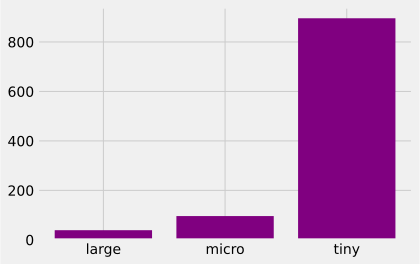

In [18]:
def caps_count(query_str):
    return cap.query(query_str).count().id

LABELS = ["large", "micro", "tiny"]

large = caps_count('market_cap_usd>3E+8')

micro = caps_count('market_cap_usd>5E+7 & market_cap_usd<3E+8')
tiny =  caps_count('market_cap_usd<5E+7')
values = [large,micro,tiny]
            
plt.bar(range(len(values)),values,tick_label=LABELS,color='purple')

### We can see easily from the above figure that most cryptocurrencies are small

# Conclusions:

## 1. There are lots of different types of cryptocurrencies (over 1000 types), but some of them lack market data

## 2. Bitcoins are extremely large compaing to other types with over $200 billion market capitalization; most types of cryptos are small and even tiny based on their market capitalization 

## 3. Cryptocurrency market is very volatile